In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [2]:
objective = 'byte_hit_rate'

In [7]:
trace_map = {
    'traceHK.tr': 'Akamai HK',
    'traceUS.tr': 'Akamai US',
    'wc200m.tr': 'Wikipedia',
    'wc400m.tr': 'Wikipedia',
    'memc_200m.tr': 'Memcachier',
    'msr_big_200m.tr': 'MSR Storage',
    'anonymous_200m.tr': 'Anonymous Application',
    'caida_cache_200m.tr': 'Caida',
}

In [3]:
trace = 'traceHK.tr'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample'])) 
    & (25000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 80000000)
    & (df.cache_type == 'GDBT')
    & (~pd.isna(df.miss_decouple))
    & (df.num_threads == '1')
    & (df.objective == 'byte_hit_rate')
    & (df.sample_rate == '128')
#     & ((df.cache_type != 'LRUK') | (df.k == '4'))
)

df1 = df[filter_idx].copy()

In [4]:
trace = 'traceUS.tr'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample'])) 
    & (25000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 100000000)
    & (df.cache_type == 'GDBT')
    & (~pd.isna(df.miss_decouple))
     & (df.num_threads == '1')
    & (df.objective == 'byte_hit_rate')
    & (df.sample_rate == '64')
)

df1 = df[filter_idx].copy()

In [5]:
trace = 'wc400m.tr'

df = common.load_reports()
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
    & (~df.cache_type.isin(['Inf', 'BeladySample'])) 
    & (25000000000 <= df.cache_size)
    & (df.cache_size <= 400000000000)
    & (df.n_warmup == 80000000)
    & (df.cache_type == 'GDBT')
    & (~pd.isna(df.miss_decouple))
    & (df.objective == 'byte_hit_rate')
    & (df.version == 'double_penalty')
    & (df.num_threads == '1')
    & (df.sample_rate == '256')
    & (df.batch_size == '100000')
    & ((df.cache_type != 'LRUK') | (df.k == '4'))
)

df1 = df[filter_idx].copy()

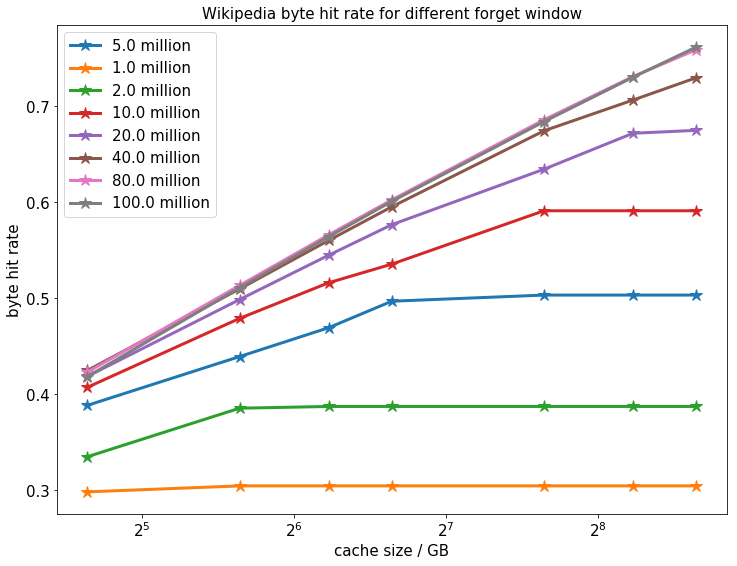

In [8]:
fig, ax = plt.subplots(figsize=(12, 9))
forget_windows = df1.forget_window.drop_duplicates()
for f in forget_windows:
    grp = df1[df1.forget_window == f]
    grp = grp.sort_values(by=['cache_size'])
    ax.semilogx(grp.cache_size/1e9,
              grp[objective], 
              label=f'{float(f)/1e6} million', 
              marker='*', 
              markersize=12,
              basex=2)
plt.legend()
plt.xlabel('cache size / GB')
plt.ylabel('byte hit rate')
plt.title(f'{trace_map[trace]} byte hit rate for different forget window')
plt.show()